# <span style='color :#E4CCA8' > Iris Flower Classification </span>
_______


  1. [ Data Import](#1) <br>
  2. [ Data Preparation](#2)<br>
  3. [ Data Splitting](#3)<br>
  4. [ Choosing the Model -KNN](#4)<br>
  5. [ Fitting the Model](#5)<br>
  6. [ Model Evaluation](#6)<br>
  7. [ Saving the Model ](#7)<br>
  8. [ Other Algorithms](#8)<br>
     8.1 [ Logistic Regression](#8.1)<br>
     8.2 [ Decision Tree](#8.2)<br>
     8.3 [ Random Forest](#8.3)<br>
     8.4 [ Linear SVM(Suport Vector Machines)](#8.4)<br>
     8.5 [ Kernel SVM(Suport Vector Machines)](#8.5)<br>
  9. [ Comparison Between Algorithms](#9)<br>

## 1. Data Import <a class="anchor" id="1"></a>

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pandas as pd

In [2]:
#use a data set from Scikit-Learn with 3 classes (Setosa,Versicolor,Virginica)
#50 samples/class
#data set - with number as parameters and shape (150,4): sepal lenght,sepal width,petal lenght,petal width -
#target set - with integer between 0-2
iris = load_iris()

features = iris.feature_names
labels = iris.target_names

In [3]:
labels

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
features

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

## 2. Data Preparation <a class="anchor" id="2"></a>

In [5]:
# split the data in X(features) and y(labels = target)
X = iris.data
y = iris.target

In [6]:
#use DataFrame to view the first 5 records
data = {
  features[0]: X[:,0],
  features[1]: X[:,1],
  features[2]: X[:,2],
  features[3]: X[:,3],
  "labels": y

}

#load data into a DataFrame object:
df = pd.DataFrame(data)

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),labels
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


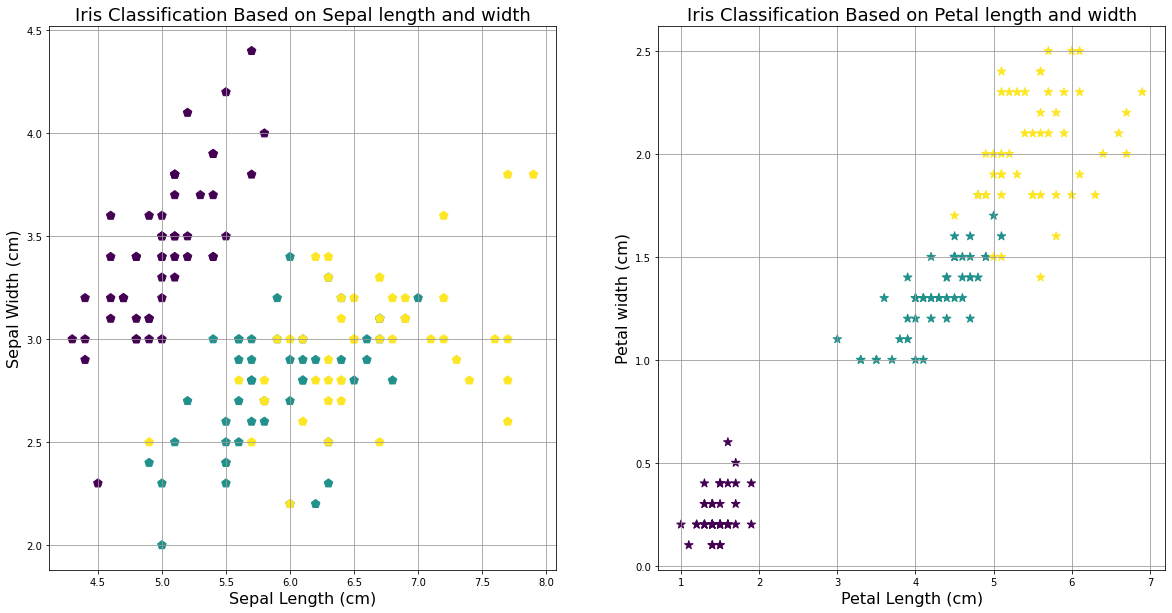

In [7]:
from matplotlib import pyplot as plt
%matplotlib inline
from matplotlib import cm

# Petal Length and Width
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(121)
ax.set_title('Iris Classification Based on Sepal length and width', fontsize=18)
ax.set_xlabel('Sepal Length (cm)', fontsize=16)
ax.set_ylabel('Sepal Width (cm)',fontsize=16)
# setting grid lines 
ax.grid(True,linestyle='-',color='0.6')
ax.scatter(df['sepal length (cm)'], df['sepal width (cm)'], s = 80, 
           c=df['labels'], marker='p')

# Sepal Length and Width
ax = fig.add_subplot(122)
ax.set_title("Iris Classification Based on Petal length and width", fontsize=18)
ax.set_xlabel('Petal Length (cm)', fontsize=16)
ax.set_ylabel('Petal width (cm)', fontsize=16)
ax.grid(True, linestyle='-', color='0.6')
ax.scatter(df['petal length (cm)'], df['petal width (cm)'], s = 80, 
           c=df['labels'], marker='*')

## 3. Data Splitting <a class="anchor" id="3"></a>

In [8]:
#split the data in training set and testing set
#80% training data and 220% test data=
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2)
print('Training set: ', X_train.shape)
print('Testing set: ', X_test.shape)

Training set:  (120, 4)
Testing set:  (30, 4)


## 4. Choosing the Model <a class="anchor" id="4"></a>

Text(0, 0.5, 'Accuracy')

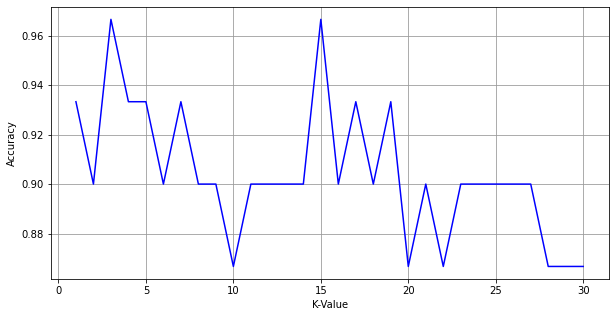

In [9]:
#to find the optimal value for k, the accuracy of the model will be plotted
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
k_range = range(1, 31)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    
# plot the relationship between K and testing accuracy
fig = plt.figure(figsize=(10,5))

plt.grid(True, linestyle='-', color='0.6')
plt.plot(k_range, scores, color="blue")
plt.xlabel("K-Value")
plt.ylabel("Accuracy")   

In [10]:
#find the optim  K (the number of closest neighbors)
a= max(scores)
a
for k in k_range:
    if scores[k] == a:
        k_optim = k
        print('Optim k is: ',k_optim)
        break

Optim k is:  2


## 5. Fitting the Model<a class="anchor" id="5"></a>

In [11]:
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

## 6. Model Evaluation <a class="anchor" id="6"></a>

In [12]:
y_prediction = knn.predict(X_test)

In [13]:
#compare the prediction made on the test data set with the true values of the labels
from sklearn import metrics
a = metrics.accuracy_score(y_test, y_prediction)
a

0.9

In [14]:
#make predictions on my own data set
my_sample = [[2, 3, 4, 5]]
predictions = knn.predict(my_sample)
predicted_species = [iris.target_names[p] for p in predictions]
predicted_species

['virginica']

## 7. Saving the Model <a class="anchor" id="7"></a>

In [15]:
#save the model
import joblib
knn_model = joblib.dump(knn, 'KNN_model.joblib')
# model = joblib.load('KNN_model.joblib')

## 8. Other Algorithms <a class="anchor" id="8"></a>
### 8.1 Logistic Regression<a class="anchor" id="8.1"></a>

In [17]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='lbfgs', max_iter=1000)
lr.fit(X_train, y_train)
y_predictions = lr.predict(X_test)
predictions = lr.predict([[2,3,4,5]])
predicted_species = [iris.target_names[p] for p in predictions]
print(predicted_species)
a1 = metrics.accuracy_score(y_test, y_predictions)
print('Accuracy = ',a1)

['virginica']
Accuracy =  0.9666666666666667


### 8.2 Decision Tree<a class="anchor" id="8.2"></a>

In [18]:
from sklearn import tree
decision_tree = tree.DecisionTreeClassifier(criterion='gini')
decision_tree.fit(X_train, y_train)
y_predictions = decision_tree.predict(X_test)
predictions = decision_tree.predict([[2,3,4,5]])
predicted_species = [iris.target_names[p] for p in predictions]
print(predicted_species)
a2 = metrics.accuracy_score(y_test, y_predictions)
print('Accuracy = ',a2)

['virginica']
Accuracy =  0.8666666666666667


### 8.3 Random Forest<a class="anchor" id="8.3"></a>

In [19]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
y_predictions = random_forest.predict(X_test)
predictions = random_forest.predict([[2,3,4,5]])
predicted_species = [iris.target_names[p] for p in predictions]
print(predicted_species)
a3 = metrics.accuracy_score(y_test, y_predictions)
print('Accuracy = ',a3)

['virginica']
Accuracy =  0.9


### 8.4 Linear SVM(Suport Vector Machines)<a class="anchor" id="8.4"></a>

In [20]:
from sklearn.svm import SVC
linear_svm = SVC(kernel='linear', C=1.0)
linear_svm.fit(X_train, y_train)
y_predictions = linear_svm.predict(X_test)
predictions = linear_svm.predict([[2,3,4,5]])
predicted_species = [iris.target_names[p] for p in predictions]
print(predicted_species)
a4 = metrics.accuracy_score(y_test, y_predictions)
print('Accuracy = ',a4)

['virginica']
Accuracy =  0.9666666666666667


### 8.5 Kernel SVM(Suport Vector Machines)<a class="anchor" id="8.5"></a>

In [21]:
from sklearn.svm import SVC
kernel_svm = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)
kernel_svm.fit(X_train, y_train)
y_predictions = kernel_svm.predict(X_test)
predictions = kernel_svm.predict([[2,3,4,5]])
predicted_species = [iris.target_names[p] for p in predictions]
print(predicted_species)
a5 = metrics.accuracy_score(y_test, y_predictions)
print('Accuracy = ',a5)

['virginica']
Accuracy =  0.9


## 9. Comparison Between Algorithms <a class="anchor" id="9"></a>

In [23]:
comparison = pd.DataFrame({
    'Model': ['K-NN','Logistic Regression', 'Decision Tree','Random Forest' ,'Linear SVM','Kernel SVM'],
    'Score': [a, a1, a2, a3, a4, a5]})
comparison_df = comparison.sort_values(by='Score', ascending=False)

comparison_df

,Model,Score
1,Logistic Regression,0.966667
4,Linear SVM,0.966667
0,K-NN,0.900000
3,Random Forest,0.900000
5,Kernel SVM,0.900000
2,Decision Tree,0.866667
